# Latar Belakang
Youtube (website video sharing terbesar di dunia) memiliki list untuk "top trending videos" yang ada di platform mereka. menurut majalan Variety, "untuk menentukan top trending video youtube tahun ini, YouTube menggunakan kombinasi dari pengukuran interaksi dengan penonton (jumlah views, shares, comment dan like). dengan catatan mereka bukanlah top views dari tahun tersebut.

# Pernyataan masalah
dengan banyaknya konten kreator yang ada di youtube, apa saja kriteria konten / Youtube post seorang youtuber untuk memperoleh top trending pada video video yang akan dibuat? dengan adanya data historis dan pengolahan data dari kriteria video yang trending, seorang youtuber atau konten kreator dapat memilih konten / Youtube post untuk memiliki peluang menjadi top trending Youtube yang lebih besar.

**bagaimana karakteristik video top trending Youtube?**


# Data Set
untuk menganalisis permasalaahn tersebut, terdapat data yang sudah dikumpulkan oleh Youtube API yang merupakan data top trending video harian dari platform mereka. kali ini analisis akan difokuskan pada region US (Amerika Serikat / United States)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

coding berikut merupakan proses load dataset file csv

In [2]:
df1 = pd.read_csv(r'USvideosS.csv')
df1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'USvideosS.csv'

data set berisikan detail masing masing video trending yang berada di US, ada 15 kolom pada tabel data set Trending Youtube Video Statistics
1. video_id                     : ID unik yang dimiliki tiap video
1. trending_date                : tanggal ini menjadi trending
1. title                        : Judul video
1. channel_title                : Nama chanel video
1. category_id                  : jenis kategori (dijelaskan lebih lanjut pada file json)
1. publish_time                 : tanggal video di upload
1. tags                         : kata kunci untuk mengakses video
1. views                        : total jumlah akun yang melihat video
1. likes                        : total jumlah akun yang menyukai video
1. dislikes                     : total jumlah akun yang tidak menyukai video
1. comment_count                : jumlah total komentar
1. thumbnail_link               : link video
1. comments_disabled            : perlakukan melarang comment oleh channel
1. ratings_disabled             : perlakukan melarang ratings oleh channel
1. video_error_or_removed       : video masih terdapat di internet/tidak (eror atau di delete)
1. description                  : penjelasan video

coding berikut merupakan proses load dataset dari json, yang berisikan keterangan detail kategori video

In [ ]:
df2 = pd.read_json(r'US_category_id.json')
df2.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


pada data json, terdapat 3 kolom, yaitu
1. kind
1. etag
1. items

pada kolom items, terdapat jenis data dictionary yang perlu untuk di split/dipecah karena terdapat informasi seperti 
1. kind
1. etag
1. id
1. snippet yang memuat channel ID, Title dan jenis assign

dalam pengolahan data, diperlukan keterangan id dan juga Title dari kolom snippet. sehingga diperlukan pengolahan yang akan dijelaskan di bagian data preparation

# Data Understanding and Cleaning

### Penggabungan Data Set

Sebelum melakukan cleaning, saya akan melakukan penyatuan data karena terdapat 2 Database yang digunakan. yaitu file csv yang memuat detail dari tiap video yang trending, dan juga data json yang memuat kategori video yang trending. sehingga diperlukan penyatuan data dari kedua database. 

pada file json, kolom 'items' perlu di split sehingga keluar keterangan berupa id dan juga title yang akan menjelaskan keterangan 'category_id' pada file csv. berikut merupakan pengolahan untuk memperoleh kolom 'id' dan 'title'

In [ ]:
df2['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [ ]:
df3=pd.DataFrame(df2['items'].tolist())
df3.head()

,kind,etag,id,snippet
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit..."


In [ ]:
df4=pd.DataFrame(df3['snippet'].tolist())
df4.head()

,channelId,title,assignable
0,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [ ]:
df2=pd.concat([df2,df3,df4],axis=1)
df2.head()

,kind,etag,items,kind,etag,id,snippet,channelId,title,assignable
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [ ]:
df3=df2[['id','title']]
df3['id']=df3['id'].astype(int)
df3.rename(columns={'id':'category_id_json','title':'category'},inplace=True)
display(df3.head(),df3.dtypes)

,category_id_json,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


category_id_json     int32
category            object
dtype: object

jenis data 'id' dirubah menjadi int supaya dapat sejenis dengan 'category_id' pada tabel csv.

selanjutnya data set csv (df1) dan json (df3) dapat dijadikan 1

In [ ]:
df1.rename(columns={'category_id':'category_id_csv'},inplace=True)
df4=df1.merge(df3,how='left',left_on='category_id_csv',right_on='category_id_json')
df4.head()

,video_id,trending_date,title,channel_title,category_id_csv,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_id_json,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",24,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,24,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment


selanjutnya saya melakukan pengecekan jumlah data sehingga data analisis .csv setelah dilakukan penggabungan data

In [ ]:
print("data berikut merupakan Trending Youtube Video Statistic (US) pada file csv")
df1.info()

data berikut merupakan Trending Youtube Video Statistic (US) pada file csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id_csv         40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 n

In [ ]:
print("data berikut merupakan keterangan kategori video pada file json")
df3.info()

data berikut merupakan keterangan kategori video pada file json
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category_id_json  32 non-null     int32 
 1   category          32 non-null     object
dtypes: int32(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
print("data berikut merupakan hasil penggabungan kedua dataset")
df4.info()

data berikut merupakan hasil penggabungan kedua dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id_csv         40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14

data df4 yang merupakan hasil gabungan data set yang berasal dari df1, dataset Trending Youtube Video Statistic dan df 3 merupakan keteragan video category yang terdapat pada file json.

terlihat bahwa df4, atau hasil penggabungan tidak berubah jumlah baris dari data awalnya, atau dengan artian hasil penyocokan category_id (left dataset) pada dataset df1 dan sudah ter mapping dengan bantuan keterangan kategori (right dataset) pada dataset df3. selain itu semua kategory id pada dataset df1 ada atau semua baris memiliki data kategori yang tersimpan pada df3 karene tidak terdapat baris kosong (semuanya berjumlah 40901)

sehingga saya menggunakan df4 sebagai database yang akan digunakan dalam proses analisis.

In [ ]:
df=df4

### Data Understanding

* dalam keberjalanannya, proses penghapusan data akan membuat kita memahami tiap maksud dari data
* kode dibawah untuk mengetahui jumlah, mengidentifikasi cell kosong (Null), dan mengetahui jenis data pada tabel

In [ ]:
print(f'jumlah data dalam dataset adalah {df.shape}')
df.info()

jumlah data dalam dataset adalah (40949, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id_csv         40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_err

kode dibawah untuk mengetahui parameter pada masing masing kolom

In [ ]:
display(df.describe(), df.describe(include='object'))

,category_id_csv,views,likes,dislikes,comment_count,category_id_json
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,19.972429
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,7.568327
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,17.000000
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,24.000000
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,25.000000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,43.000000


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40949,40949,40949,40949,40949,40949,40949,40379,40949
unique,6351,205,6455,2207,6269,6055,6352,6901,16
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...,Entertainment
freq,30,200,30,203,50,1535,30,58,9964


kode dibawah untuk melihat detail jumlah nilai unik masing masing kolom beserta isinya

In [ ]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   video_id                6351               
1   trending_date           205                
2   title                   6455               
3   channel_title           2207               
4   category_id_csv         16                 
5   publish_time            6269               
6   tags                    6055               
7   views                   40478              
8   likes                   29850              
9   dislikes                8516               
10  comment_count           13773              
11  thumbnail_link          6352               
12  comments_disabled       2                  
13  ratings_disabled        2                  
14  video_error_or_removed  2                  
15  description             6901               
16  category_id_json        16                 
17  category                16                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

sehingga dengan data berikut, kita dapat mengetahui
1. data terdiri dari 40949 baris dan 18 kolom
1. terdapat data kosong pada kolom description, namun karena **string description terlalu ber-variasi dan konteksnya tidak selalu relevan (terkadang berisi link untuk video atau media sosial dari akun uploader), kolom description akan di hapus**
1. selain itu, terdapat beberapa kolom yang tidak relevan dalam analisis ini, seperti **thumbnail link** yang berisikan link foto pada tampilan depan video, maka akan di hapus, variabel ini juga berkaitan dekat dengan video_id. proses analisisnya akan dilakukan lebih lanjut.
1. kolom video_error_or_removed tidak relevan terhadap analisis, karena ketika masuk dalam data set ini, video sudah pernah trending terlebih dahulu sebelum error atau di removed, maka kolom ini akan di delete
1. akibat penggabungan data, terdapat kolom dengan data yang sama yaitu **category_id yang sumbernya dari file json dan csv, akan di hapus salah satunya**
1. pengecekan terhadap duplikasi input atau data yang memiliki duplikasi persis pada setiap kolomnya
1. publish_time dan trending_date merupakan data yang seharusnya memiliki tipe date, makan akan dilakukan tindak lanjut berupa perubahan tipe data dan pengecekan(publish_date lebih dahulu dari trending_date).
1. data tags merupakan data string yang dipakai untuk mencari keyword video, selanjutnya akan dicek lebih detail untuk mempermudah proses analisis

### Data Cleaning

#### Description data
untuk mengetahui dampak penghapusan data yang kosong, dilihat terlebih dahulu persentase / banyaknya data yang kosong terhadap total baris yang ada

In [ ]:
df.isna().sum()/df.shape[0]

video_id                  0.00000
trending_date             0.00000
title                     0.00000
channel_title             0.00000
category_id_csv           0.00000
publish_time              0.00000
tags                      0.00000
views                     0.00000
likes                     0.00000
dislikes                  0.00000
comment_count             0.00000
thumbnail_link            0.00000
comments_disabled         0.00000
ratings_disabled          0.00000
video_error_or_removed    0.00000
description               0.01392
category_id_json          0.00000
category                  0.00000
dtype: float64

terlihat bahwa data kosong hanya terdapat di kolom description dan hanya 0.0139 bagian atau 1.39% dari data keseluruhan, nilai ini tidak signifikan dan mengingat data ini tidak relevan, makia kolom akan dihapus

In [ ]:
df.drop(['description'],axis=1,inplace=True)

#### Thumbnail_link data
pertama dilakukan pengecekan terhadap double data thumbnail_link

In [ ]:
df.duplicated(subset=['thumbnail_link']).value_counts()

True     34597
False    6352 
dtype: int64

terdapat data duplikat sejumlah 34597 buah pada thumbnail link, artinya 1 link video bisa mengalami lebih dari 1 kali trending, untuk melihat contoh duplicate data, ditampilkan data sebagai berikut

In [ ]:
df.sort_values(by=['thumbnail_link']).head()

,video_id,trending_date,title,channel_title,category_id_csv,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_id_json,category
39169,-0CMnp02rNY,18.06.06,Mindy Kaling's Daughter Had the Perfect Reaction to Entering Oprah's House,TheEllenShow,24,2018-06-04T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""ellentube""|""ellen audience""|""season 15 episode 165""|""mindy kaling""|""mindy kaling baby""|""oprah""|""mindy""|""kaling""|""mindy kaling the office""|""mindy kaling a wrinkle in time""|""mindy kaling and b.j. novak""|""katherine""|""oprahs house""|""ellen fans""|""ellen tickets""|""season 15""|""daughter""|""mindy kaling daughter""|""bj novak""|""baby daddy""|""ocean's 8""|""oceans 8 movie""|""the office""|""interview""|""new""|""funny""|""hilarious""|""sandra bullock""|""anne hathaway""|""wrinkle in time""",475965,6531,172,271,https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg,False,False,False,24,Entertainment
40208,-0CMnp02rNY,18.11.06,Mindy Kaling's Daughter Had the Perfect Reaction to Entering Oprah's House,TheEllenShow,24,2018-06-04T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""ellentube""|""ellen audience""|""season 15 episode 165""|""mindy kaling""|""mindy kaling baby""|""oprah""|""mindy""|""kaling""|""mindy kaling the office""|""mindy kaling a wrinkle in time""|""mindy kaling and b.j. novak""|""katherine""|""oprahs house""|""ellen fans""|""ellen tickets""|""season 15""|""daughter""|""mindy kaling daughter""|""bj novak""|""baby daddy""|""ocean's 8""|""oceans 8 movie""|""the office""|""interview""|""new""|""funny""|""hilarious""|""sandra bullock""|""anne hathaway""|""wrinkle in time""",800359,9773,332,423,https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg,False,False,False,24,Entertainment
40007,-0CMnp02rNY,18.10.06,Mindy Kaling's Daughter Had the Perfect Reaction to Entering Oprah's House,TheEllenShow,24,2018-06-04T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""ellentube""|""ellen audience""|""season 15 episode 165""|""mindy kaling""|""mindy kaling baby""|""oprah""|""mindy""|""kaling""|""mindy kaling the office""|""mindy kaling a wrinkle in time""|""mindy kaling and b.j. novak""|""katherine""|""oprahs house""|""ellen fans""|""ellen tickets""|""season 15""|""daughter""|""mindy kaling daughter""|""bj novak""|""baby daddy""|""ocean's 8""|""oceans 8 movie""|""the office""|""interview""|""new""|""funny""|""hilarious""|""sandra bullock""|""anne hathaway""|""wrinkle in time""",792613,9720,330,413,https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg,False,False,False,24,Entertainment
39375,-0CMnp02rNY,18.07.06,Mindy Kaling's Daughter Had the Perfect Reaction to Entering Oprah's House,TheEllenShow,24,2018-06-04T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""ellentube""|""ellen audience""|""season 15 episode 165""|""mindy kaling""|""mindy kaling baby""|""oprah""|""mindy""|""kaling""|""mindy kaling the office""|""mindy kaling a wrinkle in time""|""mindy kaling and b.j. novak""|""katherine""|""oprahs house""|""ellen fans""|""ellen tickets""|""season 15""|""daughter""|""mindy kaling daughter""|""bj novak""|""baby daddy""|""ocean's 8""|""oceans 8 movie""|""the office""|""interview""|""new""|""funny""|""hilarious""|""sandra bullock""|""anne hathaway""|""wrinkle in time""",605506,7848,232,354,https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg,False,False,False,24,Entertainment
39795,-0CMnp02rNY,18.09.06,Mindy Kaling's Daughter Had the Perfect Reaction to Entering Oprah's House,TheEllenShow,24,2018-06-04T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""ellentube""|""ellen audience""|""season 15 episode 165""|""mindy kaling""|""mindy kaling baby""|""oprah""|""mindy""|""kaling""|""mindy kaling the office""|""mindy kaling a wrinkle in time""|""mindy kaling and b.j. novak""|""katherine""|""oprahs house""|""ellen fans""|""ellen tickets""|""season 15""|""daughter""|""mindy kaling daughter""|""bj novak

* terlihat bahwa data yang memiliki thumbnail sama, memiliki keternagan view, like, dislikes, dan comment count yang berbeda. setelah dilihat dari tanggalnya, terdapat perbedaan tanggal trending date.

* dengan adanya fakta ini, diketahui bahwa ketika terdapat 1 video yang trending beberapa kali, makan akan dilakukan pencatatan beberapa kali dengan pengambilan data (cut off) pada saat video tersebut trending.

* sehingga untuk mengetahui karakteristik video top trending, thumbnail link menjadi tidak relevan (karena data akan sama meskipun trending di hari yang berbeda) selain itu penggunaannya hanya berupa akses link atau alamat web.

* selanjutnya terdapat korelasi antara thumnail_link dan video_id, yaitu 
    * thumbnail_link : https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg
    * video_id : 1ZAPwfrtAFY

    korelasi yaitu berupa karakter pada video_id yang terdapat pada thumbnail_link

    (sumber : [GitHub](https://gist.github.com/jakebellacera/d81bbf12b99448188f183141e6696817) )

* berdasarkan sumber berikut, dilakukan pengecekan terhadap isi video_id dan thumbnail_link yang seharusnya memiliki korelasi kuat

In [ ]:
a=[]
#jika isi dari video_id tidak terdapat pada thumbnail_link, maka nilai a akan mengisi indeks baris dari data tersebut
for i in range(df.shape[0]):
    if(df['thumbnail_link'][i].find(df['video_id'][i])==-1):
        a.append(i)
print("korelasi video_id dan thumbnail_link adalah  ",(1-len(a)/df.shape[0])*100," %, dan berikut merupakan indeks anomali :",a)

korelasi video_id dan thumbnail_link adalah   99.99267381376835  %, dan berikut merupakan indeks anomali : [15499, 15755, 15980]


dilakukan pengecekan terhadap indeks anomali

In [ ]:
df.loc[[(15499),(15755),(15980)]]

,video_id,trending_date,title,channel_title,category_id_csv,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_id_json,category
15499,kZete48ZtsY,18.01.02,Deleted video,Midnight Video,1,2018-01-29T13:00:00.000Z,"horror|""horror short""|""short""|""short film""|""mystery date""|""scary""|""monster""|""thriller""|""board game""|""terrifying""|""horrifying""|""Zak White""|""Todd Spence""|""Midnight Video""|""suspense""|""nostalgia""|""Your Date Is Here""|""Where Is It""|""creature""|""ghost""|""Fantastic Fest""|""scary short film""|""horror short film""|""Are You Afraid Of The Dark""|""Goosebumps""",60262,4804,122,736,https://i.ytimg.com/vi/-V1Oo7srGf0/default.jpg,False,False,True,1,Film & Animation
15755,kZete48ZtsY,18.02.02,Deleted video,DaHoopSpot Productions,17,2017-12-16T04:29:25.000Z,[none],2611,8,12,5,https://i.ytimg.com/vi/NzCSJrxQyQI/default.jpg,False,False,True,17,Sports
15980,kZete48ZtsY,18.03.02,Deleted video,DaHoopSpot Productions,17,2017-12-16T04:29:25.000Z,[none],2620,8,12,5,https://i.ytimg.com/vi/NzCSJrxQyQI/default.jpg,False,False,True,17,Sports


ditemukan bahwa data yang tidak sama, memiliki video_id yang sama yaitu 'kZete48ZtsY', untuk pengecekan lebih lanjut, ditampilkan data dengan video_id yang serupa

In [ ]:
cek=df.loc[df['video_id']=='kZete48ZtsY']

In [ ]:
cek

,video_id,trending_date,title,channel_title,category_id_csv,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_id_json,category
14822,kZete48ZtsY,18.29.01,Roger Federer 20th Grand Slam Victory Tribute,ATPWorldTour,17,2018-01-28T17:47:53.000Z,[none],33042,1297,12,96,https://i.ytimg.com/vi/kZete48ZtsY/default.jpg,False,False,False,17,Sports
15061,kZete48ZtsY,18.30.01,Roger Federer 20th Grand Slam Victory Tribute,ATPWorldTour,17,2018-01-28T17:47:53.000Z,[none],64330,1829,21,145,https://i.ytimg.com/vi/kZete48ZtsY/default.jpg,False,False,False,17,Sports
15258,kZete48ZtsY,18.31.01,Roger Federer's 20th Grand Slam Victory Tribute,ATPWorldTour,17,2018-01-28T17:47:53.000Z,"atp|""world""|""tour""|""2018""|""tennis""|""sport""|""pro tennis""|""circuit""|""professional tennis""|""tennis video""|""men tennis""|""worldwide""|""tournament""|""match""|""watch live""|""daily""|""season""|""australian open""|""grand slam""|""australia""|""australia tennis""|""australia grand slam""|""melbourne""|""photo shoot""|""roger federer""|""federer""|""20 majors""|""20 grand slams""|""milestone""|""aus open""|""wimbledon""|""roland garros""|""us open""",74080,1977,22,162,https://i.ytimg.com/vi/kZete48ZtsY/default.jpg,False,False,False,17,Sports
15499,kZete48ZtsY,18.01.02,Deleted video,Midnight Video,1,2018-01-29T13:00:00.000Z,"horror|""horror short""|""short""|""short film""|""mystery date""|""scary""|""monster""|""thriller""|""board game""|""terrifying""|""horrifying""|""Zak White""|""Todd Spence""|""Midnight Video""|""suspense""|""nostalgia""|""Your Date Is Here""|""Where Is It""|""creature""|""ghost""|""Fantastic Fest""|""scary short film""|""horror short film""|""Are You Afraid Of The Dark""|""Goosebumps""",60262,4804,122,736,https://i.ytimg.com/vi/-V1Oo7srGf0/default.jpg,False,False,True,1,Film & Animation
15755,kZete48ZtsY,18.02.02,Deleted video,DaHoopSpot Productions,17,2017-12-16T04:29:25.000Z,[none],2611,8,12,5,https://i.ytimg.com/vi/NzCSJrxQyQI/default.jpg,False,False,True,17,Sports
15980,kZete48ZtsY,18.03.02,Deleted video,DaHoopSpot Productions,17,2017-12-16T04:29:25.000Z,[none],2620,8,12,5,https://i.ytimg.com/vi/NzCSJrxQyQI/default.jpg,False,False,True,17,Sports


* setelah melihat data yang memiliki video_id **kZete48ZtsY**, terdapat perbedaan kelengkapan data yaitu ketidak samaan antara video_id dan thumbnail_link yang kemungkinan karena error input,

* kecurigaan lebih lanjut karena data **kZete48ZtsY** yang memiliki kelengkapan yang salah, memiliki ciri deleted video, selanjutnya dilakukan peninjauan lebih lanjut terhadap deleted video.

In [ ]:
df.loc[df['video_error_or_removed']==True].tail(5)

,video_id,trending_date,title,channel_title,category_id_csv,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_id_json,category
33187,1Aoc-cd9eYs,18.07.05,Cobra Kai Ep 2 - Strike First - The Karate Kid Saga Continues,Cobra Kai,24,2018-05-02T16:02:35.000Z,"Cobra Kai|""Karate Kid""|""YouTube Red Original Series""|""YouTube Red Originals""|""YouTube Red""|""Ralph Macchio""|""Billy Zabka""|""Xolo Maridueña""|""Courtney Henggeler""|""Mary Mouser""|""Tanner Buchanan""|""Ed Asner""|""karate kid series""|""johnny lawrence""|""daniel larusso""|""miyagi""|""cobra kai series""|""cobra kai youtube""|""wax on wax off""|""cobra kai karate kid""",672609,4916,197,1269,https://i.ytimg.com/vi/1Aoc-cd9eYs/default.jpg,False,False,True,24,Entertainment
33414,1Aoc-cd9eYs,18.08.05,Cobra Kai Ep 2 - Strike First - The Karate Kid Saga Continues,Cobra Kai,24,2018-05-02T16:02:35.000Z,"Cobra Kai|""Karate Kid""|""YouTube Red Original Series""|""YouTube Red Originals""|""YouTube Red""|""Ralph Macchio""|""Billy Zabka""|""Xolo Maridueña""|""Courtney Henggeler""|""Mary Mouser""|""Tanner Buchanan""|""Ed Asner""|""karate kid series""|""johnny lawrence""|""daniel larusso""|""miyagi""|""cobra kai series""|""cobra kai youtube""|""wax on wax off""|""cobra kai karate kid""",412323,25441,208,952,https://i.ytimg.com/vi/1Aoc-cd9eYs/default.jpg,False,False,True,24,Entertainment
33620,1Aoc-cd9eYs,18.09.05,Cobra Kai Ep 2 - Strike First - The Karate Kid Saga Continues,Cobra Kai,24,2018-05-02T16:02:35.000Z,"Cobra Kai|""Karate Kid""|""YouTube Red Original Series""|""YouTube Red Originals""|""YouTube Red""|""Ralph Macchio""|""Billy Zabka""|""Xolo Maridueña""|""Courtney Henggeler""|""Mary Mouser""|""Tanner Buchanan""|""Ed Asner""|""karate kid series""|""johnny lawrence""|""daniel larusso""|""miyagi""|""cobra kai series""|""cobra kai youtube""|""wax on wax off""|""cobra kai karate kid""",251857,6623,231,1120,https://i.ytimg.com/vi/1Aoc-cd9eYs/default.jpg,False,False,True,24,Entertainment
33837,1Aoc-cd9eYs,18.10.05,Cobra Kai Ep 2 - Strike First - The Karate Kid Saga Continues,Cobra Kai,24,2018-05-02T16:02:35.000Z,"Cobra Kai|""Karate Kid""|""YouTube Red Original Series""|""YouTube Red Originals""|""YouTube Red""|""Ralph Macchio""|""Billy Zabka""|""Xolo Maridueña""|""Courtney Henggeler""|""Mary Mouser""|""Tanner Buchanan""|""Ed Asner""|""karate kid series""|""johnny lawrence""|""daniel larusso""|""miyagi""|""cobra kai series""|""cobra kai youtube""|""wax on wax off""|""cobra kai karate kid""",629055,30695,277,1033,https://i.ytimg.com/vi/1Aoc-cd9eYs/default.jpg,False,False,True,24,Entertainment
34594,1Aoc-cd9eYs,18.14.05,Cobra Kai Ep 2 - Strike First - The Karate Kid Saga Continues,Cobra Kai,24,2018-05-02T16:02:35.000Z,"Cobra Kai|""Karate Kid""|""YouTube Red Original Series""|""YouTube Red Originals""|""YouTube Red""|""Ralph Macchio""|""Billy Zabka""|""Xolo Maridueña""|""Courtney Henggeler""|""Mary Mouser""|""Tanner Buchanan""|""Ed Asner""|""karate kid series""|""johnny lawrence""|""daniel larusso""|""miyagi""|""cobra kai series""|""cobra kai youtube""|""wax on wax off""|""cobra kai karate kid""",1062499,32276,4594,5547,https://i.ytimg.com/vi/1Aoc-cd9eYs/default.jpg,False,False,True,24,Entertainment


setelah dilakukan identifikasi, **tidak terdapat keanehan** terhadap video yang sudah dihapus (video_error_or_removed = True), sehingga dilakukan penghapusan terhadap baris 15499, 15755, 15980 karena dianggap salah input.

In [ ]:
df.drop([15499, 15755, 15980],inplace=True)
df.reset_index(drop=True,inplace=True)

selanjutnya dilakukan drop kolom thumbnail_link dan video_id karena kegunaannya untuk identifikasi video tidak relevan terhadap analisis.

In [ ]:
df.drop(['thumbnail_link','video_id'],axis=1,inplace=True)


#### Category_id data
untuk meringkas data set, data duplikat mengenai category_id yang bersumber dari file json dan csv akan dihapus salah satunya

In [ ]:
df.drop(['category_id_json'],axis=1,inplace=True)
df.rename(columns={'category_id_csv':'category_id'},inplace=True)

#### video_error_or_removed

karena data tidak relevan, maka kolom akan dihapus

In [ ]:
df.drop(['video_error_or_removed'],axis=1,inplace=True)

#### Duplikasi Data atau Double Input

dilakukan pengecekan terhadap keseluruhan baris yang memiliki isi sama persis dengan barisnya

In [ ]:
df.duplicated().value_counts()

False    40898
True     48   
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

tidak terdapat baris double atau double input pada data set

#### trending_date dan publish_time


sebelum dilakukan pembersihan, untuk keperluan analisis dilakukan pembuatan variabel day_post dan hour_post

dialkukan perubahan tipe data publish_time menjadi datetime

In [ ]:
df['publish_time']=pd.to_datetime(df['publish_time'],utc=True)
df['publish_time']=df['publish_time'].dt.tz_localize(None)

In [ ]:
df["day_post"]=df['publish_time'].dt.day_name()
df["hour_post"]=df['publish_time'].dt.hour

selanjutna perubahan tipe data trending_date, karena format tanggal **tahun.hari.bulan** maka dilakukan perubahan format terlebih dahulu sehingga dapat dirubah menjadi tipe date

In [ ]:
a=[]
for date in df['trending_date']:
    tahun=date[0:2]
    hari=date[3:5]
    bulan=date[6:8]
    a.append(hari+'/'+bulan+'/'+tahun)
b={}
b['trending_date_new']=a

c=pd.DataFrame(b)

data tanggal baru ada pada dataframe 'c'. lalu digabung ke data set sebelumnya (df)
pe dan dilakukan penghapusan kolom trending_date

In [ ]:
df=pd.concat([df,c],axis=1)

lalu dilakukan perubahan tipe data menjadi date type

In [ ]:
df['trending_date_new']=pd.to_datetime(df['trending_date_new'])

dari kebutuhan analisis dan untuk mengecek validitas trending_date dan publish_time, dibuat kolom baru berupa 'duration' untuk mengecek apakah nilai 'publish_time' lebih dahulu dari 'trending_date' 

In [ ]:
df['duration (days)']=(df['trending_date_new']-df['publish_time']).dt.days
print ( "terdapat data bernilai kurang dari 0 (jarak ke trending date dari publish_time negatif) adalah : ",df[df['duration (days)']<0].shape[0])
print ("persentase nilai kolom 'duration' kurang dari 0 dari keseluruhan data sebesar : ", df[df['duration (days)']<0].shape[0]/df.shape[0]*100," %")

terdapat data bernilai kurang dari 0 (jarak ke trending date dari publish_time negatif) adalah :  5256
persentase nilai kolom 'duration' kurang dari 0 dari keseluruhan data sebesar :  12.836418697797097  %


berdasarkan nilai durasi dari sejak video di publish dan menjadi trending, terdapat anomali data berupa nilai yang negatif (trending_date terlebih dahulu daripada publish_time),maka dilakukan pengecekan terlebih dahulu pada data yang dimaksud.

In [ ]:
df[['trending_date','trending_date_new','publish_time','duration (days)']].loc[df['duration (days)']<0]

,trending_date,trending_date_new,publish_time,duration (days)
215,17.15.11,2017-11-15,2017-11-15 01:25:18,-1
216,17.15.11,2017-11-15,2017-11-15 03:43:47,-1
241,17.15.11,2017-11-15,2017-11-15 03:11:17,-1
608,17.17.11,2017-11-17,2017-11-17 05:00:01,-1
632,17.17.11,2017-11-17,2017-11-17 04:20:40,-1
...,...,...,...,...
39144,18.05.06,2018-05-06,2018-05-09 17:29:47,-4
39145,18.05.06,2018-05-06,2018-05-09 07:00:01,-4
39148,18.06.06,2018-06-06,2018-06-06 01:58:03,-1
40546,18.13.06,2018-06-13,2018-06-13 01:18:57,-1


dari data yang ditampilkan, nilai minus terdapat pada hari yang sama dari trending_date dan publish_time, dikarenakan kekurangan data berupa jam pada trending_date. untuk simplifikasi, dilakukan pengurangan keterangan data dengan mengabaikan jam pada publish_time

In [ ]:
from datetime import datetime,date

In [ ]:
df['publish_time'] = pd.to_datetime(df['publish_time']).dt.normalize()

In [ ]:
df['duration (days)']=(df['trending_date_new']-df['publish_time']).dt.days


In [ ]:
df[['trending_date','trending_date_new','publish_time','duration (days)']].loc[df['duration (days)']<0]

,trending_date,trending_date_new,publish_time,duration (days)
3400,17.01.12,2017-01-12,2017-11-29,-321
3401,17.01.12,2017-01-12,2017-11-29,-321
3402,17.01.12,2017-01-12,2017-11-30,-322
3403,17.01.12,2017-01-12,2017-11-29,-321
3404,17.01.12,2017-01-12,2017-11-29,-321
...,...,...,...,...
39141,18.05.06,2018-05-06,2018-05-10,-4
39142,18.05.06,2018-05-06,2018-05-10,-4
39143,18.05.06,2018-05-06,2018-05-11,-5
39144,18.05.06,2018-05-06,2018-05-09,-3


In [ ]:
print ( "terdapat data bernilai kurang dari 0 (jarak ke trending date dari publish_time negatif) adalah : ",df[df['duration (days)']<0].shape[0])
print ("persentase nilai kolom 'duration' kurang dari 0 dari keseluruhan data sebesar : ", df[df['duration (days)']<0].shape[0]/df.shape[0]*100," %")

terdapat data bernilai kurang dari 0 (jarak ke trending date dari publish_time negatif) adalah :  5174
persentase nilai kolom 'duration' kurang dari 0 dari keseluruhan data sebesar :  12.636154935769062  %


dibandingkan sebelum pengabaian jam, data error turun sebanyak 0.2%, setelah dilihat input waktu yang tidak masuk akal, maka 5174 data yang memiliki kesalahan data yaitu trending_date yang lebih dahulu dari publish_time

penghapusan data yang cukup signifikan (12.6%) terpaksa dilakukan untuk proses analisis berkaitan dengan 'durasi', atau jarak waktu dari upload hingga video tersebut trending

In [ ]:
df.drop(df[df["duration (days)"]<0].index,axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35772 entries, 0 to 35771
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   trending_date      35772 non-null  object        
 1   title              35772 non-null  object        
 2   channel_title      35772 non-null  object        
 3   category_id        35772 non-null  int64         
 4   publish_time       35772 non-null  datetime64[ns]
 5   tags               35772 non-null  object        
 6   views              35772 non-null  int64         
 7   likes              35772 non-null  int64         
 8   dislikes           35772 non-null  int64         
 9   comment_count      35772 non-null  int64         
 10  comments_disabled  35772 non-null  bool          
 11  ratings_disabled   35772 non-null  bool          
 12  category           35772 non-null  object        
 13  day_post           35772 non-null  object        
 14  hour_p

selanjutnya dilakukan drop column yang sudah tidak terpakai yaitu trending_date dan merubah kolom trending_date_new menjadi trending_date

In [ ]:
df.drop(['trending_date'],axis=1,inplace=True)
df.rename(columns={'trending_date_new':'trending_date'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35772 entries, 0 to 35771
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              35772 non-null  object        
 1   channel_title      35772 non-null  object        
 2   category_id        35772 non-null  int64         
 3   publish_time       35772 non-null  datetime64[ns]
 4   tags               35772 non-null  object        
 5   views              35772 non-null  int64         
 6   likes              35772 non-null  int64         
 7   dislikes           35772 non-null  int64         
 8   comment_count      35772 non-null  int64         
 9   comments_disabled  35772 non-null  bool          
 10  ratings_disabled   35772 non-null  bool          
 11  category           35772 non-null  object        
 12  day_post           35772 non-null  object        
 13  hour_post          35772 non-null  int64         
 14  trendi

#### Tags Data



* selanjutnya dilakukan proses simplifikasi terhadap kolom tags, penjelasan mengenai tags saya kutip dari [google](https://support.google.com/youtube/answer/146402?hl=en) yang menyatakan bahwa "Tags are descriptive keywords you can add to your video to help viewers find your content." sehingga tags, dapat membantu untuk proses pencarian video yang diupload dan dapat membantu video menjadi top trending Youtube.

* data yang terdapat di dalam kolom tags merupakan gabungan dari string yang memperjelas video, untuk mempermudah analisis, dilakukan simplifikasi dengan menghitung jumlah tags yang terdapat pada masing masing baris

selanjutnya dilakukan pengecekan terhadap nilai data pada kolom tags

In [ ]:
df

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category,day_post,hour_post,trending_date,duration (days)
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,False,False,People & Blogs,Monday,17,2017-11-14,1
1,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,False,False,Entertainment,Monday,7,2017-11-14,1
2,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,5339,8181,False,False,Comedy,Sunday,19,2017-11-14,2
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""rhett and link good mythical morning""|""good mythical morning rhett and link""|""mythical morning""|""Season 12""|""nickelback lyrics""|""nickelback lyrics real or fake""|""nickelback""|""nickelback songs""|""nickelback song""|""rhett link nickelback""|""gmm nickelback""|""lyrics (website category)""|""nickelback (musical group)""|""rock""|""music""|""lyrics""|""chad kroeger""|""canada""|""music (industry)""|""mythical""|""gmm challenge""|""comedy""|""funny""|""challenge""",343168,10172,666,2146,False,False,Entertainment,Monday,11,2017-11-14,1
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""idy""|""rhpc""|""dares""|""no truth""|""comments""|""comedy""|""funny""|""stupid""|""fail""",2095731,132235,1989,17518,False,False,Entertainment,Sunday,18,2017-11-14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35767,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""|""kitten""|""kittens""|""prince michael""|""prince""|""michael""|""laser""|""olympics""|""red""|""dream""",1685609,38160,1385,2657,False,False,Pets & Animals,Friday,13,2018-06-14,27
35768,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,3936,False,False,People & Blogs,Friday,1,2018-06-14,27
35769,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER BASED ON HER FEATURES: BTS! |bradmondo,Brad Mondo,24,2018-05-18,"I gave safiya nygaard a perfect hair makeover based on her features: bts|""brad mondo""|""safiya and tyler""|""safiya nygaard""|""hair transformation""|""makeover""|""I got a perfect makeover based on my features""|""bts""|""hairdresser reacts""|""before and after""|""hair""|""makeup""|""transformation""|""ANTM""|""what not to wear""|""the ideal haircut and color for your face""|""safiya buzzfeed""|""color for your skin tone""|""haircut for your face shape""|""tutorial""|""balayage""|""hair stylist""|""hair color""|""hair tutorial""",1066451,48068,1032,3992,False,False,Entertainment,Friday,17,2018-06-14,27
35770,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|""How It Should Have Ended""|""parody""|""comedy""|""entertainment""|""wakanda""|""Chadwick Boseman""|""Michael B Jordan""|""movies""|""animation""|""fortnite""|""azerrz""|""movie""|""plothole""|""review""|""childish gambino""|""donald glover""|""this is america""|""ending explained""",5660813,192957,2846,13088,False,False,Film & Animation,Thursday,17,2018-06-14,28



* terdapat nilai [none] pada tags yang berarti tidak terdapat input tags, dan string tags dibatasi oleh karakter "|"
* selanjutnya dilakukan penghitungan jumlah tags

In [ ]:
a=[]
for i in df['tags']:
    if i=='[none]':
        a.append(0)
    else:
        if i.count('|"')==-1:
            a.append(1)
        else:
            a.append(i.count('|"')+1)
b={}
b['tags_count']=a
b=pd.DataFrame(b)
df=pd.concat([df,b],axis=1)
df.drop(['tags'],axis=1,inplace=True)
df.head()

,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category,day_post,hour_post,trending_date,duration (days),tags_count
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,748374,57527,2966,15954,False,False,People & Blogs,Monday,17,2017-11-14,1,1
1,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13,2418783,97185,6146,12703,False,False,Entertainment,Monday,7,2017-11-14,1,4
2,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12,3191434,146033,5339,8181,False,False,Comedy,Sunday,19,2017-11-14,2,22
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,343168,10172,666,2146,False,False,Entertainment,Monday,11,2017-11-14,1,27
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,2095731,132235,1989,17518,False,False,Entertainment,Sunday,18,2017-11-14,2,14


# Clean Data


setelah melakukan pembersihan data, berikut merupakan rekap data clean yang sudah dilakukan
1. menghapus kolom tidak relevan yaitu description, thumbnail_link, category_id_json
1. melakukan perubahan nama category_id_csv menjadi category_id
1. menghapus baris duplikat, dan mengetahui bahwa merubah judul tidak merubah video_id
1. merekap jumlah tags masing masing baris
1. melakukan perubahan tipe data publish_time dan trending_time menjadi date type

sehingga diperoleh data sebagai berikut

In [ ]:
df.head()

,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category,day_post,hour_post,trending_date,duration (days),tags_count
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,748374,57527,2966,15954,False,False,People & Blogs,Monday,17,2017-11-14,1,1
1,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13,2418783,97185,6146,12703,False,False,Entertainment,Monday,7,2017-11-14,1,4
2,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12,3191434,146033,5339,8181,False,False,Comedy,Sunday,19,2017-11-14,2,22
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,343168,10172,666,2146,False,False,Entertainment,Monday,11,2017-11-14,1,27
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,2095731,132235,1989,17518,False,False,Entertainment,Sunday,18,2017-11-14,2,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35772 entries, 0 to 35771
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              35772 non-null  object        
 1   channel_title      35772 non-null  object        
 2   category_id        35772 non-null  int64         
 3   publish_time       35772 non-null  datetime64[ns]
 4   views              35772 non-null  int64         
 5   likes              35772 non-null  int64         
 6   dislikes           35772 non-null  int64         
 7   comment_count      35772 non-null  int64         
 8   comments_disabled  35772 non-null  bool          
 9   ratings_disabled   35772 non-null  bool          
 10  category           35772 non-null  object        
 11  day_post           35772 non-null  object        
 12  hour_post          35772 non-null  int64         
 13  trending_date      35772 non-null  datetime64[ns]
 14  durati

data awal sejumlah 40949 menjadi 35772, sejumlah 5177 data sudah di dihapus karena terdapat input yang error. untuk kolom di awal sejumlah 17 menjadi 15, beberapa kolom dihapus untuk mengambil hanya data yang dianggap relevan

berikut merupakan ringkasan data yang sudah diolah

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(35772, 16)


,dataFeatures,dataType,null,unique,uniqueSample
0,title,object,0,6082,"[What $2,500 Will Get You In NYC | Sweet Digs Home Tour | Refinery29, Devin Booker And Julius Randle Wildcats Fight！“You The Full Of Shit”！]"
1,channel_title,object,0,2130,"[The Current Source, LOL Network]"
2,category_id,int64,0,16,"[25, 28]"
3,publish_time,datetime64[ns],0,310,"[2018-06-11T00:00:00.000000000, 2013-05-28T00:00:00.000000000]"
4,views,int64,0,35392,"[2252933, 395620]"
5,likes,int64,0,26762,"[398970, 4432]"
6,dislikes,int64,0,7901,"[4774, 1794]"
7,comment_count,int64,0,12638,"[10805, 580]"
8,comments_disabled,bool,0,2,"[True, False]"
9,ratings_disabled,bool,0,2,"[False, True]"


In [ ]:
display(df.describe(), df.describe(include='object'))

,category_id,views,likes,dislikes,comment_count,hour_post,duration (days),tags_count
count,35772.000000,3.577200e+04,3.577200e+04,3.577200e+04,3.577200e+04,35772.000000,35772.000000,35772.000000
mean,19.972716,2.328085e+06,7.316000e+04,3.632761e+03,8.353845e+03,13.734206,51.257660,19.634323
std,7.591075,7.256539e+06,2.263820e+05,2.758940e+04,3.736648e+04,6.456454,169.954298,12.046337
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,17.000000,2.414448e+05,5.373500e+03,2.010000e+02,6.097500e+02,10.000000,4.000000,10.000000
50%,24.000000,6.716145e+05,1.763200e+04,6.260000e+02,1.820000e+03,15.000000,7.000000,19.000000
75%,25.000000,1.806556e+06,5.409400e+04,1.928000e+03,5.629000e+03,18.000000,30.000000,29.000000
max,43.000000,2.177501e+08,5.595203e+06,1.674420e+06,1.361580e+06,23.000000,4301.000000,69.000000


,title,channel_title,category,day_post
count,35772,35772,35772,35772
unique,6082,2130,16,7
top,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,Entertainment,Friday
freq,25,177,8678,6137


# Data Analysis
sebelum memulai analisis, perlu diketahui terlebih dahulu durasi atau rentang waktu pengambilan data

In [ ]:
print("Data memiliki rentang pengambilan data Trending Date pada ",df['trending_date'].min()," hingga ",df['trending_date'].max())

Data memiliki rentang pengambilan data Trending Date pada  2017-01-12 00:00:00  hingga  2018-12-06 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35772 entries, 0 to 35771
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              35772 non-null  object        
 1   channel_title      35772 non-null  object        
 2   category_id        35772 non-null  int64         
 3   publish_time       35772 non-null  datetime64[ns]
 4   views              35772 non-null  int64         
 5   likes              35772 non-null  int64         
 6   dislikes           35772 non-null  int64         
 7   comment_count      35772 non-null  int64         
 8   comments_disabled  35772 non-null  bool          
 9   ratings_disabled   35772 non-null  bool          
 10  category           35772 non-null  object        
 11  day_post           35772 non-null  object        
 12  hour_post          35772 non-null  int64         
 13  trending_date      35772 non-null  datetime64[ns]
 14  durati

* Selanjutnya analisis akan dilakukan dengan memperhatikan rentang data tersebut, dibagi menjadi 2 tahun pada tahun 2017 dan tahun 2018

* menurut [google](https://support.google.com/youtube/answer/7239739?hl=en), terdapat banyak konsiderasi untuk menjadi trending Youtube, yaitu (tidak dibatasi):
    * View count
    * How quickly the video is generating views (i.e. “temperature”)
    * Where views are coming from, including outside of YouTube
    * The age of the video
    * How the video performs compared to other recent uploads from the same channel

    namun pada poin ke tiga, analisis tidak dapat dilakukan karena keterbatasan data sumber views.

* analisis akan dilakukan berdasarkan kutipan tersebut, dengan pembagian data "details", "input user" dan "feedback", 
    * details (input user sebagai keterangan tambahan) : title, channel_title, category_id, dan category
    * details factor : publish_time, day_post, hour_post , trending_date, comments_disabled, ratings_disabled dan tags_count
    * feedback : views, likes, dislikes, comment_count, dan duration (days)

* hal yang akan dibahas berkaitan dengan pembagian data tersebut adalah
    * ringkasan detail video yang memiliki nilai kemunculan tertinggi
    * (title, channel_title, dan category(termasuk category_id)) yang memiliki rate feedback yang baik (views, likes, dislikes, dan comment_count), seperti nilei views likes dan comment_count tinggi, dan dislikes yang rendah. ringkasan ini akan dicakup pada top 5 masing masing detail video
    * analisis detail factor (duration ( termasuk publish_time dan trending_date), comments_disabled, ratings_disabled, video_error_or_removed, dan tags_count) yang berdampak pada rate feedback yang baik.

* dilakukan penyusunan kolom data set agar menyesuailakn struktur data diatas

In [ ]:
df = df[["title", "channel_title", "category_id", "category","publish_time","day_post", "hour_post", "trending_date", "comments_disabled", "ratings_disabled","tags_count","views", "likes", "dislikes", "comment_count", "duration (days)"]]

# details Analysis

### title Analysis

kita akan melakukan analisis terhadap variabel title atau judul video

In [ ]:
# kemunculan title tertinggi
title_rate= df['title'].value_counts()
title_rate = pd.DataFrame(title_rate)
title_rate["name"]=title_rate.index
title_rate.reset_index(drop=True,inplace=True)
title_rate=title_rate.groupby('title', as_index=False).agg({'title' : 'first', 'name' : '|,| '.join}).sort_values(by=['title'],ascending=False)
title_rate.reset_index(drop=True,inplace=True)
a=[]
for i in  title_rate['name']:
    if i.find('|,|')==-1:
        a.append(1)
    else:
        a.append(i.count('|,|')+1)
a
b={}
b['title_count']=a
b=pd.DataFrame(b)
title_rate=pd.concat([title_rate,b],axis=1)
title_rate.head()

,title,name,title_count
0,25,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,1
1,24,"The ULTIMATE $30,000 Gaming PC Setup|,| Sam Smith - Pray (Official Video) ft. Logic|,| THE PROPOSAL | Felix & Marzia 💍|,| Charlie Puth - BOY [Official Audio]|,| YoungBoy Never Broke Again Goes Sneaker Shopping With Complex|,| Why I'm So Scared (being myself and crying too much)|,| Rooster Teeth Animated Adventures - Millie So Serious|,| Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures",8
2,23,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Charli XCX (Official Lyric Video)|,| 周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV|,| Bohemian Rhapsody | Teaser Trailer [HD] | 20th Century FOX|,| The Deadliest Being on Planet Earth – The Bacteriophage|,| Cobra Kai Season 2|,| FORTNITE The Movie (Official Fake Trailer)|,| Selena Gomez - Back To You (Lyric Video)|,| Childish Gambino - This Is America (Official Video)|,| BOWLING BALL Vs. OOBLECK from 45m!|,| Whats inside a Mexican Jumping Bean?|,| John Mayer - New Light|,| Getting some air, Atlas?",12
3,22,"LIGHTS OUT CHALLENGE IN FAZE RUG'S HAUNTED HOUSE | OmarGoshTV|,| Nintendo Labo|,| THE GREEN MAKEUP CHALLENGE! | NikkieTutorials|,| Why You Should Wake Up at 4:30 AM Every Day, According To A Navy SEAL|,| Destination Wedding Trailer #1 (2018) | Movieclips Trailers|,| NERF Hide Your Weapon Challenge!|,| How Michael B. Jordan's Black Panther Makeup Was Done — Exclusive Behind The Scenes|,| Original 2007 iPhone Unboxing!!!|,| Are we ready to get married?|,| We Bought A House|,| Kelly Clarkson - Meaning of Life [Official Video]|,| Backstreet Boys - Don't Go Breaking My Heart (Official Video)|,| WE GOT INTEL'S PROTOTYPE GRAPHICS CARD!!|,| 22 Years of Life Milestone|,| BLACKkKLANSMAN - Official Trailer [HD] - In Theaters August 10|,| We built the Infinity Gauntlet with 25,000 magnets!",16
4,21,"Carrie Underwood - Cry Pretty (Official Music Video)|,| Clash Royale: Meet the Rascals! (New Card!)|,| Maluma - Marinero (Official Video)|,| Florence + The Machine - Hunger|,| [ASMR] Scratching Different Objects ♡|,| Just Like You Left It|,| VLOG 8 l Weekend Night Routine l Olivia Jade|,| EVERY MUSEUM EVER|,| Robin Hood (2018 Movie) Teaser Trailer – Taron Egerton, Jamie Foxx, Jamie Dornan|,| I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER BASED ON HER FEATURES: BTS! |bradmondo|,| Official Call of Duty®: Black Ops 4 — Multiplayer Reveal Trailer|,| Céline Dion - Ashes (from the Deadpool 2 Motion Picture Soundtrack)|,| Fifth Harmony - Don't Say You Love Me",13


In [ ]:
print(
    "Data judul video dengan intensitas terbanyak dengan judul : WE MADE OUR MOM CRY...HER DREAM CAME TRUE!",'\n',
    "channel :",df.loc[df['title']=='WE MADE OUR MOM CRY...HER DREAM CAME TRUE!'].head(1)['channel_title'].item(),'\n',
    "max views : ",df.loc[df['title']=='WE MADE OUR MOM CRY...HER DREAM CAME TRUE!'].sort_values(by=['views'],ascending=False).head(1)['views'].item(),'\n',
    "max likes : ",df.loc[df['title']=='WE MADE OUR MOM CRY...HER DREAM CAME TRUE!'].sort_values(by=['likes'],ascending=False).head(1)['likes'].item(),'\n',
    "top dislikes : ",df.loc[df['title']=='WE MADE OUR MOM CRY...HER DREAM CAME TRUE!'].sort_values(by=['dislikes'],ascending=False).head(1)['dislikes'].item(),'\n',
    "max comment_count : ",df.loc[df['title']=='WE MADE OUR MOM CRY...HER DREAM CAME TRUE!'].sort_values(by=['comment_count'],ascending=False).head(1)['comment_count'].item(),
    '\n','\n',
    )

Data judul video dengan intensitas terbanyak dengan judul : WE MADE OUR MOM CRY...HER DREAM CAME TRUE! 
 channel : Lucas and Marcus 
 max views :  10381263 
 max likes :  163325 
 top dislikes :  20892 
 max comment_count :  25323 
 



video dengan top trending harian terbanyak  diperoleh video dengan judul 'WE MADE OUR MOM CRY...HER DREAM CAME TRUE!' dengan total top trending harian sebanyak 25 kali, video ini diupload oleh channel Lucas and Marcus dengan feedback atau interaksi
* views : 10381263
* likes : 163325
* dislikes : 20892 
* comment_count : 25323 

### channel_title Analysis

In [ ]:
# kemunculan chennel tertinggi
channel_rate= df['channel_title'].value_counts()
channel_rate = pd.DataFrame(channel_rate)
channel_rate["name"]=channel_rate.index
channel_rate.reset_index(drop=True,inplace=True)
channel_rate=channel_rate.groupby('channel_title', as_index=False).agg({'channel_title' : 'first', 'name' : '|,| '.join}).sort_values(by=['channel_title'],ascending=False)
channel_rate.reset_index(drop=True,inplace=True)
a=[]
for i in  channel_rate['name']:
    if i.find('|,|')==-1:
        a.append(1)
    else:
        a.append(i.count('|,|')+1)
a
b={}
b['title_count']=a
b=pd.DataFrame(b)
channel_rate=pd.concat([channel_rate,b],axis=1)
channel_rate.head()

,channel_title,name,title_count
0,177,ESPN,1
1,171,The Tonight Show Starring Jimmy Fallon,1
2,168,Vox,1
3,167,"TheEllenShow|,| Netflix",2
4,163,The Late Show with Stephen Colbert,1


In [ ]:
print(
    "Data channel dengan intensitas terbanyak dengan nama : ESPN",'\n',
    "max views : ",df.loc[df['channel_title']=='ESPN'].sort_values(by=['views'],ascending=False).head(1)['views'].item(),'\n',
    "max likes : ",df.loc[df['channel_title']=='ESPN'].sort_values(by=['likes'],ascending=False).head(1)['likes'].item(),'\n',
    "top dislikes : ",df.loc[df['channel_title']=='ESPN'].sort_values(by=['dislikes'],ascending=False).head(1)['dislikes'].item(),'\n',
    "max comment_count : ",df.loc[df['channel_title']=='ESPN'].sort_values(by=['comment_count'],ascending=False).head(1)['comment_count'].item(),
    )

Data channel dengan intensitas terbanyak dengan nama : ESPN 
 max views :  2762839 
 max likes :  31981 
 top dislikes :  37877 
 max comment_count :  21507


channel dengan intensitas top trending harian terbanyak diperoleh channel ESPN dengan total top trending harian sebanyak 177 kali dengan interaksi
* views : 2762839
* likes : 31981 
* dislikes : 37877 
* comment_count : 21507 

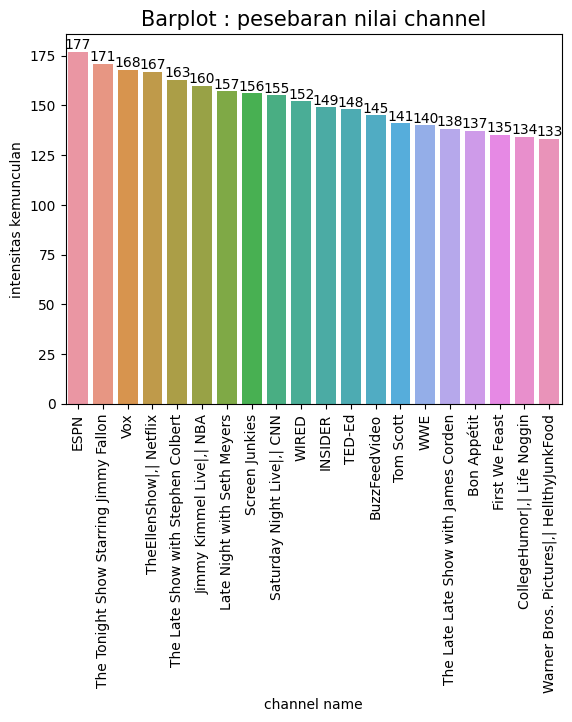

In [ ]:
ax=sns.barplot(data=channel_rate.head(20),x='name',y='channel_title')
ax.set(xlabel='channel name', ylabel='intensitas kemunculan')
for i in range(channel_rate.shape[0]):
    plt.annotate(channel_rate['channel_title'][i], xy=(i,channel_rate['channel_title'][i]), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.title('Barplot : pesebaran nilai channel',size=15)
plt.show()

### category Analysis

In [ ]:
# kemunculan category tertinggi
category_rate= df['category'].value_counts()
category_rate = pd.DataFrame(category_rate)
category_rate["name"]=category_rate.index
category_rate.reset_index(drop=True,inplace=True)
category_rate=category_rate.groupby('category', as_index=False).agg({'category' : 'first', 'name' : '|,| '.join}).sort_values(by=['category'],ascending=False)
category_rate.reset_index(drop=True,inplace=True)
a=[]
for i in  category_rate['name']:
    if i.find('|,|')==-1:
        a.append(1)
    else:
        a.append(i.count('|,|')+1)
a
b={}
b['category_count']=a
b=pd.DataFrame(b)
category_rate=pd.concat([category_rate,b],axis=1)
category_rate.head()


,category,name,category_count
0,8678,Entertainment,1
1,5598,Music,1
2,3628,Howto & Style,1
3,3003,Comedy,1
4,2770,People & Blogs,1


In [ ]:
print(
    "Data kategori dengan intensitas terbanyak yaitu : Entertainment",'\n',
    "max views : ",df.loc[df['category']=='Entertainment'].sort_values(by=['views'],ascending=False).head(1)['views'].item(),'\n',
    "max likes : ",df.loc[df['category']=='Entertainment'].sort_values(by=['likes'],ascending=False).head(1)['likes'].item(),'\n',
    "top dislikes : ",df.loc[df['category']=='Entertainment'].sort_values(by=['dislikes'],ascending=False).head(1)['dislikes'].item(),'\n',
    "max comment_count : ",df.loc[df['category']=='Entertainment'].sort_values(by=['comment_count'],ascending=False).head(1)['comment_count'].item(),
    )

Data kategori dengan intensitas terbanyak yaitu : Entertainment 
 max views :  149376127 
 max likes :  3093544 
 top dislikes :  1674420 
 max comment_count :  1361580


kategori dengan intensitas top trending harian terbanyak diperoleh kategori Entertainment dengan total top trending harian sebanyak 8678 kali dengan interaksi
* views : 149376127 
* likes : 3093544  
* dislikes : 1674420  
* comment_count : 1361580 

selanjutnya dilakukan visualisasi terhadap nilai kategori

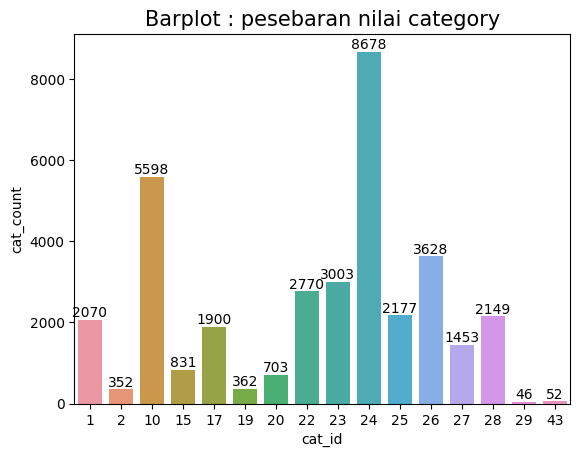

In [ ]:
a={
    "cat_id" : [],
    "cat_count" : []
}
for i in df['category_id'].unique():
    a['cat_id'].append(i)
    a['cat_count'].append(df['category_id'].loc[df['category_id']==i].value_counts().item())
# category_bar = df[['category_id',]]
a=pd.DataFrame(a)
a.sort_values(by=['cat_id'],inplace=True)
a.reset_index(drop=True,inplace=True)
sns.barplot(data=a,x='cat_id',y='cat_count')
for i in range(a.shape[0]):
    plt.annotate(a['cat_count'][i], xy=(i,a['cat_count'][i]), ha='center', va='bottom')
plt.title('Barplot : pesebaran nilai category',size=15)
plt.show()

# details factor Analysis

### comment_disabled and rating_disabled

kita akan melihat seberapa banyak video yang di setting agar penonton tidak dapat memberikan rating dan juga comment

data disabled (comment, dan ratings) dan video_error_or_removed adalah data boolean yang bernilai True atau false, kita akan melihat 

Text(0.5, 1.0, 'Setting Comments')

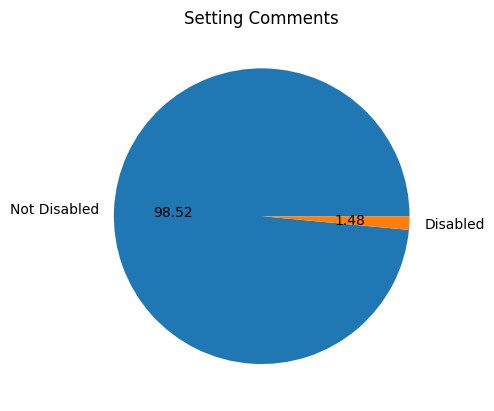

In [ ]:
a=df['comments_disabled'].value_counts().to_dict()
fig,ax=plt.subplots()
ax.pie(x=[a[False],a[True]], labels=['Not Disabled','Disabled'],autopct='%.2f')
ax.set_title('Setting Comments')

kondisi setting comment disabled ternyata berdampak secara signifikan terhadap top trending video Youtube, hanya sejumlah 1.48% dari keseluruhan data top trending yang melakukan disabled Comments

Text(0.5, 1.0, 'Settimg Ratings')

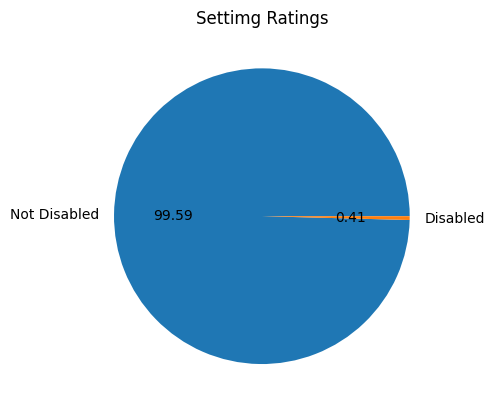

In [ ]:
a=df['ratings_disabled'].value_counts().to_dict()
fig,ax=plt.subplots()
ax.pie(x=[a[False],a[True]], labels=['Not Disabled','Disabled'],autopct='%.2f')
ax.set_title('Settimg Ratings')

kondisi setting ratings disabled ternyata berdampak secara signifikan terhadap top trending video Youtube, hanya 0.41% dari keseluruhan data top trending yang melakukan disabled Ratings

In [ ]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

85

dan untuk keduanya ternyata hanya sejumlah 85 videos yang settingan untuk rating dan comment dimatikan, data ini menunjukan setting yang dilakukan sangat signifikan

### Tags Analysis

In [ ]:
def outliers(data, kolom):
    q1 = data[kolom].quantile(0.25)
    q2 = data[kolom].quantile(0.5)
    q3 = data[kolom].quantile(0.75)
    mid = data[kolom].mean()
    stddev = data[kolom].std()
    iqr = q3 - q1
    upfence = q3 + (1.5*iqr)
    lofence = q1 - (1.5*iqr)
    maks = data[kolom].max()
    mini = data[kolom].min()
    high = data[kolom].loc[data[kolom]>q3].count()
    low = data[kolom].loc[data[kolom]<q1].count()
    print('''
    Sebaran data {} :
    nilai Q1 : {}
    nilai Q2 : {}
    nilai Q3 : {}
    nilai mean : {}
    nilai standar deviasi : {}
    Batas nilai atas : {}
    Batas nilai bawah : {}
    nilai terbesar : {}
    nilai terkecil : {}
    '''.format(kolom, q1,q2,q3,mid,stddev,upfence,lofence,maks,mini))
    
outliers(df,'tags_count')


    Sebaran data tags_count :
    nilai Q1 : 10.0
    nilai Q2 : 19.0
    nilai Q3 : 29.0
    nilai mean : 19.63432293413843
    nilai standar deviasi : 12.046337317828787
    Batas nilai atas : 57.5
    Batas nilai bawah : -18.5
    nilai terbesar : 69
    nilai terkecil : 0
    


In [ ]:
stats, pval=normaltest(df['tags_count'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


data median < mean artinya positively skewness. karena data tidak normal maka acuan analisis menggunakan median

nilai standar deviasi yang besar mengindikasikan variasi data yang sangat besar sehingga visualisasi akan dilakukan dengan menghilangkan outlier dengan batas batas data yang ada

<function matplotlib.pyplot.show(close=None, block=None)>

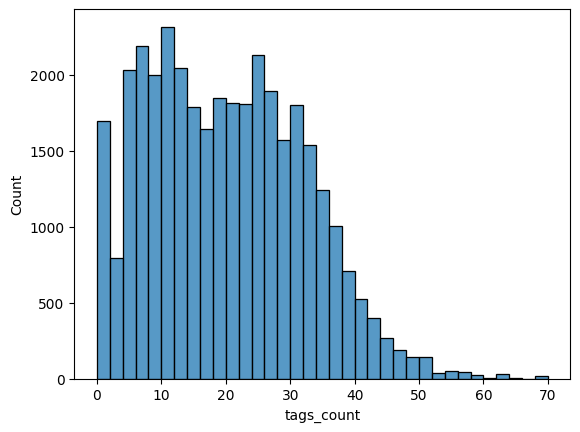

In [ ]:
sns.histplot(df['tags_count'],binwidth=2)
plt.show

sehingga melalui visualisasi grafik dan analisis deskriptif, tags memiliki rentang nilai di 10 hingga 29 buah (percentil q1 dan q3)

# Feedback Analysis

### Feedback Correlation

dalam video youtube, penonton dapat melakukan beberapa feedback yaitu views, like, dislikes dan comment, kita akan melihat korelasinya melalui visualisasi berikut

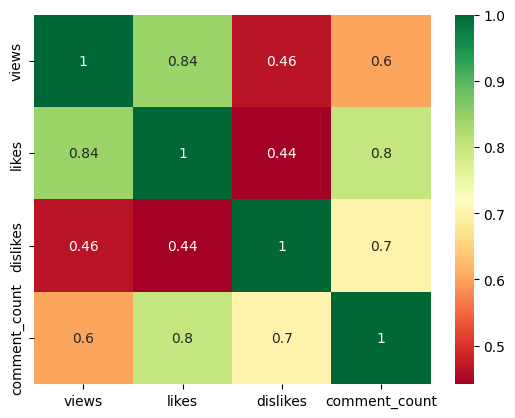

In [ ]:
feedback_corr=df[['views','likes','dislikes','comment_count']].corr()
sns.heatmap(feedback_corr,annot=True,cmap='RdYlGn')     
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35772 entries, 0 to 35771
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              35772 non-null  object        
 1   channel_title      35772 non-null  object        
 2   category_id        35772 non-null  int64         
 3   category           35772 non-null  object        
 4   publish_time       35772 non-null  datetime64[ns]
 5   day_post           35772 non-null  object        
 6   hour_post          35772 non-null  int64         
 7   trending_date      35772 non-null  datetime64[ns]
 8   comments_disabled  35772 non-null  bool          
 9   ratings_disabled   35772 non-null  bool          
 10  tags_count         35772 non-null  int64         
 11  views              35772 non-null  int64         
 12  likes              35772 non-null  int64         
 13  dislikes           35772 non-null  int64         
 14  commen

In [ ]:
feedback_corr

,views,likes,dislikes,comment_count
views,1.000000,0.841718,0.464994,0.601266
likes,0.841718,1.000000,0.441696,0.798131
dislikes,0.464994,0.441696,1.000000,0.699188
comment_count,0.601266,0.798131,0.699188,1.000000


Dari data ini terlihat bahwa : 
* adanya korelasi kuat antara views dengan like dan comment_count. hal ini tentu jelas karena ketika penonton menyukai video, kemungkinan besar akan di like.
* korelasi kuat juga terjadi di comment_count dengan views, like, dislikes, hasil ini tentu juga jelas karena ketika penonton sudah melakukan comment, tentunya sudah ada pendapat negatif (dislikes) atau positif (like), dan tentunya dengan melakukan comment, mereka telah menonton isi videonya 

### Views Analysis

In [ ]:
outliers(df,'views')


    Sebaran data views :
    nilai Q1 : 241444.75
    nilai Q2 : 671614.5
    nilai Q3 : 1806556.0
    nilai mean : 2328084.5424074694
    nilai standar deviasi : 7256538.551212682
    Batas nilai atas : 4154222.875
    Batas nilai bawah : -2106222.125
    nilai terbesar : 217750076
    nilai terkecil : 549
    


In [ ]:
from scipy.stats import normaltest
stats, pval=normaltest(df['views'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


data median < mean artinya positively skewness. karena data tidak normal maka acuan analisis menggunakan median

nilai standar deviasi yang besar mengindikasikan variasi data yang sangat besar sehingga visualisasi akan dilakukan dengan menghilangkan outlier dengan batas batas data yang ada

<function matplotlib.pyplot.show(close=None, block=None)>

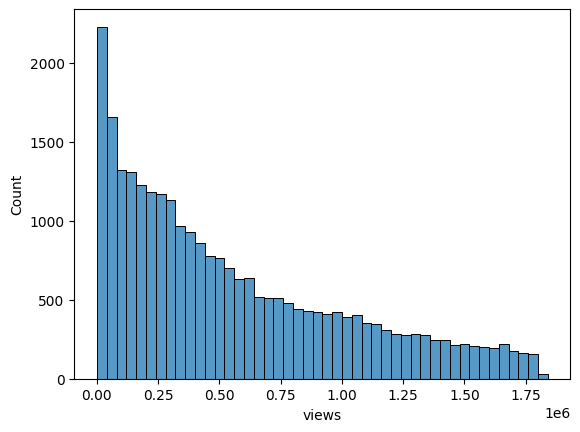

In [ ]:
sns.histplot(df['views'][df['views']<1806556],binwidth=40000)
plt.show

terlihat bahwa nilai count_views akan terus menurun ketika jumlah views semakin besar. mengacu kepada statistik deskriptif , median yang bernilai 1806556 bisa menjadi acuan seorang konten kreator sebagai target menjadi top trending youtube

### Like and dislikes Analysis

In [ ]:
outliers(df,'likes')
outliers(df,'dislikes')


    Sebaran data likes :
    nilai Q1 : 5373.5
    nilai Q2 : 17632.0
    nilai Q3 : 54094.0
    nilai mean : 73160.00371799173
    nilai standar deviasi : 226381.9970111221
    Batas nilai atas : 127174.75
    Batas nilai bawah : -67707.25
    nilai terbesar : 5595203
    nilai terkecil : 0
    

    Sebaran data dislikes :
    nilai Q1 : 201.0
    nilai Q2 : 626.0
    nilai Q3 : 1928.0
    nilai mean : 3632.760594878676
    nilai standar deviasi : 27589.402392935415
    Batas nilai atas : 4518.5
    Batas nilai bawah : -2389.5
    nilai terbesar : 1674420
    nilai terkecil : 0
    


In [ ]:
for i in ['likes','dislikes']:
    stats, pval=normaltest(df[i])
    if pval<=0.05:
        print('data ',i,' tidak normal') #Ha
    else: 
        print('data ',i,' distribusi normal') #Ho 

data  likes  tidak normal
data  dislikes  tidak normal


data median < mean artinya positively skewness. karena data tidak normal maka acuan analisis menggunakan median

nilai standar deviasi yang besar mengindikasikan variasi data yang sangat besar. jika tidak memungkinkan, visualisasi akan dilakukan dengan menghilangkan outlier dengan batas batas data yang ada

In [ ]:
a={
    "likes" : [],
    "dislikes" : []
}
for i in range(category_rate.shape[0]):
    a['likes'].append(df['likes'].loc[df['category']==category_rate.loc[[i]]['name'].item()].sum()/1000)
    a['dislikes'].append(-df['dislikes'].loc[df['category']==category_rate.loc[[i]]['name'].item()].sum()/1000)
a=pd.DataFrame(a)
category_rate=pd.concat([category_rate,a],axis=1)

In [ ]:
category_rate

,category,name,category_count,likes,dislikes
0,8678,Entertainment,1,433970.102,-34500.041
1,5598,Music,1,1232933.002,-45264.815
2,3628,Howto & Style,1,137792.137,-4456.399
3,3003,Comedy,1,188085.762,-6368.145
4,2770,People & Blogs,1,166673.877,-8846.133
5,2177,News & Politics,1,15144.242,-3597.300
6,2149,Science & Technology,1,72050.058,-4069.790
7,2070,Film & Animation,1,146011.480,-5488.662
8,1900,Sports,1,83603.879,-4696.579
9,1453,Education,1,42140.204,-1145.787


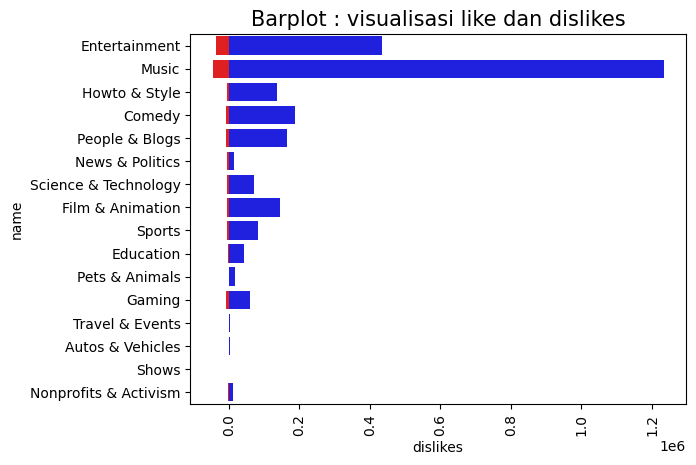

In [ ]:
sns.barplot(data=category_rate,x='likes',y='name',color='blue')
sns.barplot(data=category_rate,x='dislikes',y='name',color='red')
plt.xticks(rotation=90)
plt.title('Barplot : visualisasi like dan dislikes',size=15)
plt.show()

nilai likes dan dislikes tidak berpengaruh pada kemungkinan masuk ke top trending youtube videos, namun terdapat nilai likes terbanyak dengan kategori Music

### Duration Analysis

In [ ]:
outliers(df,'duration (days)')


    Sebaran data duration (days) :
    nilai Q1 : 4.0
    nilai Q2 : 7.0
    nilai Q3 : 30.0
    nilai mean : 51.25765962205077
    nilai standar deviasi : 169.95429812827086
    Batas nilai atas : 69.0
    Batas nilai bawah : -35.0
    nilai terbesar : 4301
    nilai terkecil : 0
    


In [ ]:
stats, pval=normaltest(df['duration (days)'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


data median < mean artinya positively skewness. karena data tidak normal maka acuan analisis menggunakan median

nilai standar deviasi yang besar mengindikasikan variasi data yang sangat besar sehingga visualisasi akan dilakukan dengan menghilangkan outlier dengan batas batas data yang ada

<function matplotlib.pyplot.show(close=None, block=None)>

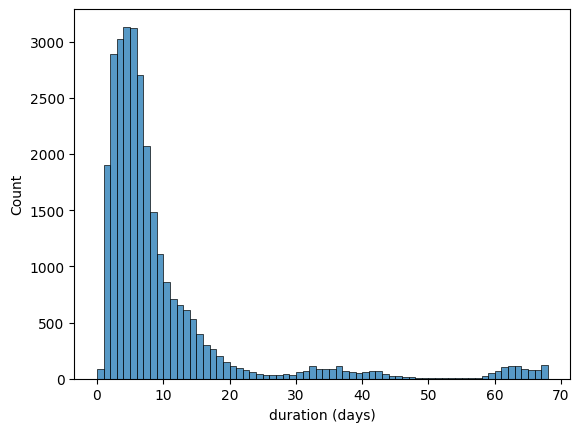

In [ ]:
sns.histplot(df['duration (days)'][df['duration (days)']<69],binwidth=1)
plt.show

# Posting Analysis

untuk mengetahui waktu yang tepat dalam melakukan post, akan dibuat suatu data set untuk mengetahui keterangan jam dan hari dari masing masing top trending videos youtube

### day_post Analysis

In [ ]:
a=df['day_post'].value_counts().to_dict()
b={"days" :["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],
    
    "count_intensity":[a["Sunday"],
            a["Monday"],
            a["Tuesday"],
            a["Wednesday"],
            a["Thursday"],
            a["Friday"],
            a["Saturday"]]
}
day_post =  pd.DataFrame(b)
day_post
# outliers(b,'count')

,days,count_intensity
0,Sunday,3207
1,Monday,5419
2,Tuesday,5843
3,Wednesday,5912
4,Thursday,6111
5,Friday,6137
6,Saturday,3143


In [ ]:
df['day_post']

0        Monday  
1        Monday  
2        Sunday  
3        Monday  
4        Sunday  
          ...    
35767    Friday  
35768    Friday  
35769    Friday  
35770    Thursday
35771    Thursday
Name: day_post, Length: 35772, dtype: object

data median > mean artinya negatively skewness. karena data memiliki skewness maka acuan analisis menggunakan median

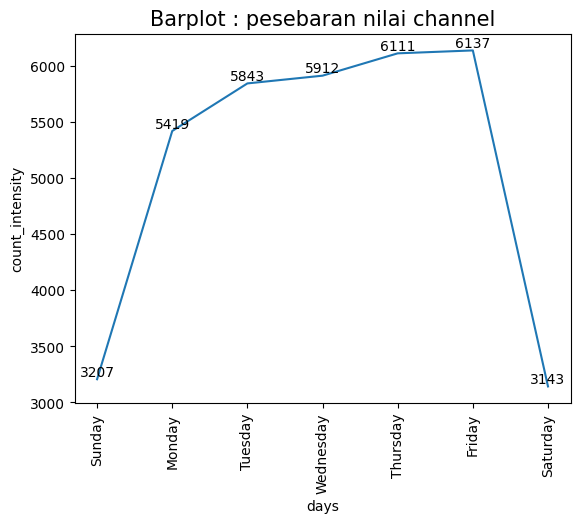

In [ ]:
sns.lineplot(data=day_post,x='days',y='count_intensity')
for i in range(day_post.shape[0]):
    plt.annotate(day_post['count_intensity'][i], xy=(i,day_post['count_intensity'][i]), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.title('Barplot : pesebaran nilai channel',size=15)
plt.show()

### hour_post Analysis

In [ ]:
hour_post=df['hour_post'].value_counts().to_frame()
hour_post.reset_index(inplace=True)
hour_post.sort_values(by=['index'],inplace=True)


In [ ]:
outliers(hour_post,'hour_post')


    Sebaran data hour_post :
    nilai Q1 : 788.0
    nilai Q2 : 1309.0
    nilai Q3 : 1847.5
    nilai mean : 1490.5
    nilai standar deviasi : 842.4222322513244
    Batas nilai atas : 3436.75
    Batas nilai bawah : -801.25
    nilai terbesar : 3170
    nilai terkecil : 466
    


data median < mean artinya positive skewness. karena data memiliki skewness maka acuan analisis menggunakan median

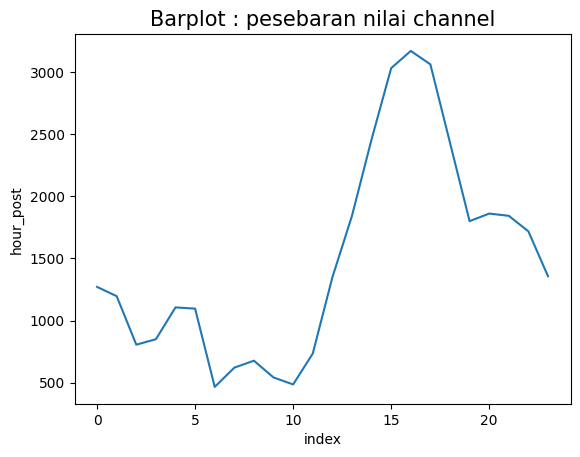

{'days': ['Sunday',
  'Monday',
  'Tuesday',
  'Wednesday',
  'Thursday',
  'Friday',
  'Saturday'],
 'count_intensity': [3207, 5419, 5843, 5912, 6111, 6137, 3143]}

In [ ]:
sns.lineplot(data=hour_post,x='index',y='hour_post')
plt.title('Barplot : pesebaran nilai channel',size=15)
plt.show()
display (b)

untuk mendapatkan potensi menjadi top trending videos terbanyak, waktu post perlu diatur di setiap hari rabu, kamis atau jumat pada jam 3 hingga 5 sore

# Kesimpulan

berdasarkan analisis top trending video pada tahun 2017 dan tahun 2018, diperoleh ringkasan informasi yang terjadi selama 2017 dan 2018 di top trending youtube US sebagai berikut:

* seklias informasi mengenai top trending youtube, yaitu :
    1. video dengan intensitas top trending terbanyak dengan judul : "WE MADE OUR MOM CRY...HER DREAM CAME TRUE!" oleh channel : "Lucas and Marcus"
    1. Data channel dengan intensitas terbanyak dengan urutan : ESPN, The Tonight Show Starring Jimmy Fall, dan Vox
    1. Kategori dengan intensitas top trending terbanyak dengan urutan : Entertainment, Music dan Howto & Style 


* karakteristik perlakuan uploader atau konten kreator : 
    1. melakukan disable rating dan juga comment berpengaruh signifikan kepada kemungkinan menjadi top trending youtube
    1. tags yang menjadi kata kunci pencarian video, memiliki rentang nilai di 10 hingga 29 buah (percentil q1 dan q3)

* feedback dari views
    1. adanya korelasi kuat antara views dengan like dan comment_count
    1. korelasi kuat terjadi di comment_count dengan views, like, dislikes
    1. nilai median yang menjadi acuan analisis dapat menjadi target konten kreator yaitu sebesar 1806556 buah views
    1. nilai likes dan dislikes tidak berpengaruh pada kemungkinan masuk ke top trending youtube videos, namun terdapat nilai likes terbanyak dengan kategori Music
    1. rata rata video yang menjadi top trending youtube terjadi setelah 5 hari atau 1 minggu setelah dilakukan post
    1. post lebih baik dilakukan pada setiap hari rabu, kamis atau jumat di jam 3 hingga 5 sore untuk mendapatkan kemungkinan lebih tinggi menjadi top trending youtube

sehingga dalam menjadi seorang konten kreator, perlu dipertimbangkan beberapa input berikut untuk masuk ke dalam top trending
1. membuat video dengan kategori entertainment, music, atau howto & Style
1. melkukan input tags sebanyak 10 hingga 29 buah
1. melakukan promosi video selama 7 hari berturut turut sejak upload video, sehingga views / traffic akses video semakin banyak
1. melakukan upload pada hari rabu, kamis atau jumat di jam 3 hinggal 5 sore 

In [ ]:
with pd.ExcelWriter(r"C:\Users\ASUS\Downloads\DATA VSCODE-20221113T033012Z-001\DATA VSCODE\CAPSTONE MODUL2\dataoutput.xlsx") as writer:
    title_rate.to_excel(writer,sheet_name="title rate",index=False)
    channel_rate.to_excel(writer,sheet_name="channel rate",index=False)
    category_rate.to_excel(writer,sheet_name="category rate",index=False)
    day_post.to_excel(writer,sheet_name="days post",index=False)
    hour_post.to_excel(writer,sheet_name="hour post",index=False)
    df.to_excel(writer,sheet_name="data set",index=False)
    feedback_corr.to_excel(writer,sheet_name="feedback",index=False)